# Capa convolucional. 

En este notebook, visualizamos cuatro salidas filtradas (también conocidas como mapas de activación) de una capa convolucional.

En este ejemplo, *nosotros* estamos definiendo cuatro filtros que se aplican a una imagen de entrada inicializando los **pesos** de una capa convolucional, pero una CNN entrenada, la red aprenderá los valores de estos pesos.

![OverFitting](https://drive.google.com/uc?export=view&id=1tyI9a8do69Qzi9O0jQwZAsylz0lDIUfk)


### Importamos la imagen. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


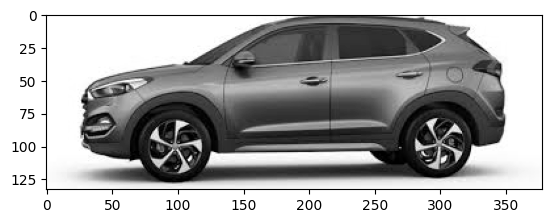

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!

img_path = '/content/drive/MyDrive/resources/Auto.jfif'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

### Definamos los filtros. 

In [7]:
import numpy as np

## Se puede modificar libremente. Estamos definiendo el operador de convolución. 
filter_vals = np.array(
    [[-1, -1, 1, 1],
     [-1, -1, 1, 1],
     [-1, -1, 1, 1],
     [-1, -1, 1, 1]]
)

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [8]:
# Definiendo 4 filtros. Obtenidos desde `filter_vals` 
# Definiendo los filtros. 
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# Miremos uno.
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


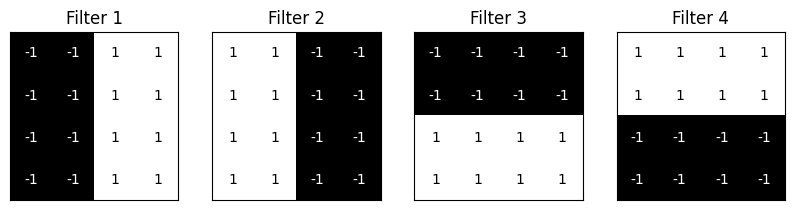

In [9]:
# Veamos todos los filtros. 
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Definamos una capa convolucional. 


Partimos definiendo una capa Convolucional. Inicialice una sola capa convolucional para que contenga todos los filtros creados. Tenga en cuenta que no está entrenando esta red; ¡Está inicializando los pesos en una capa convolucional para que pueda visualizar lo que sucede después de un paso directo a través de esta red!


#### `__init__` and `forward`

Para definir una red neuronal en PyTorch, defina las capas de un modelo en la función `__init__` y defina el comportamiento hacia adelante de una red que aplica esas capas inicializadas a una entrada (` x`) en la función `forward`. En PyTorch, convertimos todas las entradas en el tipo de datos Tensor.

A continuación, se define la estructura de una clase llamada `Net` que tiene una capa convolucional que puede contener cuatro filtros de escala de grises 4x4.

In [10]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms


In [12]:
from torch import nn, optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, weight):
        super().__init__()
        
        k_height, k_width = weight.shape[2:]

        # Al crear la capa se indica que son 4 filtros.
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight) # Estamos asignando los pesos. 
        
    def forward(self, x):
        # Calcula la salida de la capa convolucional. 
        conv_x = self.conv(x) #Aqui aplica los kernel.
        activated_x = F.relu(conv_x)# Aqui aplica una relu.

        # retornamos ambas capas.
        return conv_x, activated_x

In [13]:
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)


In [14]:
model = Net(weight)

### Vamos ahora a visualizar la salida de una capa. 

Primero, definiremos una función auxiliar, `viz_layer` que toma una capa específica y una cantidad de filtros (argumento opcional), y muestra la salida de esa capa una vez que se ha pasado una imagen. Utilice como referencia el siguiente código. 


In [15]:
# Defina la función viz_layer
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
 
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray') # LA transformamos al formato adecuado para visualizar. 
        ax.set_title('Salida %s' % str(i+1))

Veamos el resultado de una capa convolucional, antes y después de que se aplique una función de activación ReLu.


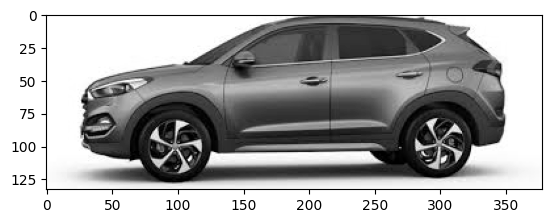

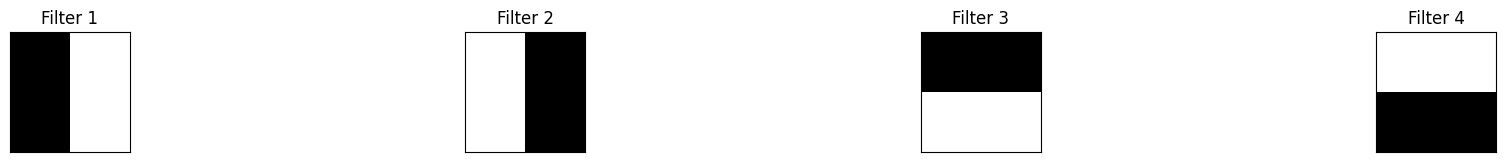

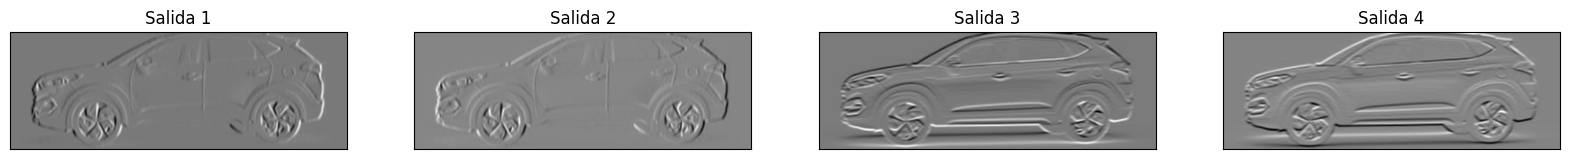

In [16]:
# Código
# Imagen original.
plt.imshow(gray_img, cmap='gray')
 
# Visualizando los filtros.
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
 
 
# Convirtiendo a un tensor la imagen para ser procesada por la red. ¿Que ejecuta este código?
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)
 
# Obtengamos las capas. 
conv_layer, activated_layer = model(gray_img_tensor)
 
# Veamos la salida. SIn aplicar relu
viz_layer(conv_layer)

#### ReLu activation

En este modelo, hemos utilizado una función de activación que escala la salida de la capa convolucional. Hemos elegido una función ReLu para hacer esto, y esta función simplemente convierte todos los valores de píxeles negativos en ceros (negro). Consulte la ecuación que se muestra a continuación para ver los valores de píxeles de entrada, `x`.

![OverFitting](https://drive.google.com/uc?export=view&id=1gWJkNE9ohn0mR6EbKTCNNvIECt7Ko8Hl)


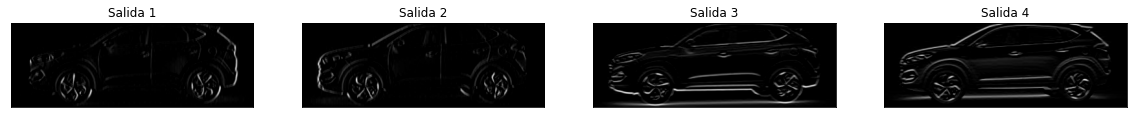

In [ ]:
# Aplicando Relu
viz_layer(activated_layer)

Repita el ejercicio con otra imágen que usted elija.